<a href="https://colab.research.google.com/github/omotayoofere/Football-Players-classification-using-KMeans-Clustering/blob/main/Football_player_identification_using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [15]:
from google.colab import drive

In [16]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
player_df = pd.read_csv('/content/gdrive/MyDrive/Datasets/players_22.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
#Fatures to cluster players basd on
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [19]:
#Drop missing values in selected columns of dataset
player_df = player_df.dropna(subset=features)

In [39]:
player_df

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [20]:
data=player_df[features].copy()

In [8]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [80]:
#Scaling the data to make sure that minimum data is 1 and max data is 10
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [81]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,5.078302,5.799998,1.243826,1.146473,4.403716
std,1.496262,1.323418,0.557253,0.392477,1.750932
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.043478,4.913043,1.014306,1.024022,2.851852
50%,5.130435,5.782609,1.071531,1.049796,4.333333
75%,6.000000,6.652174,1.214592,1.102634,5.814815
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [27]:
data.head(10)

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.565217,9.141631,4.020341,6.666667
1,9.782609,9.347826,7.711016,6.159616,5.925926
2,9.565217,9.130435,7.711016,2.319231,7.407407
3,9.565217,9.130435,7.711016,6.649329,4.814815
4,9.565217,9.130435,10.000000,6.468908,5.185185
5,9.565217,9.565217,3.705293,5.773000,4.444444
6,9.565217,10.000000,6.566524,10.000000,2.222222
7,9.347826,8.913043,2.446352,0.695445,7.037037
8,9.347826,9.347826,7.138770,5.102866,4.814815
9,9.347826,8.913043,6.852647,6.675103,4.074074


In [82]:
#Initialize random centroids
#Creating 5 centroids based on selected features to work with by randomly sample a single point from each column and turning the resultant to a pandas series
#with each point turned into a float data type. 

def random_centroids(data, k):
  centroids = []
  for i in range(k):
    centroid = data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids, axis=1)

In [83]:
#Each feature is a centroid
centroids = random_centroids(data, 5)
centroids

,0,1,2,3,4
overall,5.130435,3.826087,4.260870,5.565217,2.304348
potential,4.913043,4.913043,7.956522,7.086957,6.217391
wage_eur,1.643777,1.071531,1.643777,1.042918,1.100143
value_eur,1.097479,1.071704,1.047219,1.030465,1.092324
age,1.740741,5.814815,6.185185,2.481481,2.851852


In [66]:
centroids.iloc[:,0]

overall      1.739130
potential    5.217391
wage_eur     0.008584
value_eur    0.033043
age          0.740741
Name: 0, dtype: float64

In [84]:
#Label data point based on how far they're from the centroids by looking at each point in the data frame and finding the Euclidean distance between that data point and each cluster center
#Find the center that's closest to that data point

def get_labels(data, centroids):
  distances = centroids.apply(lambda x: np.sqrt(((data - x) **2).sum(axis=1)))
  #Finds the cluster assignment for each data point by finding the min distance between each player and each centroid created
  return distances.idxmin(axis=1)
  

In [85]:
labels = get_labels(data, centroids)

In [86]:
labels.value_counts()

1    7313
3    6206
4    3224
2    1751
0     671
dtype: int64

In [87]:
#Update centroids
#Find all points in a cluster and take the geometric mean of the cluster; Take natural log of each data point and find the mean of all values in a row
#Basically grouping the dataset by the cluster derived and applying the equation for finding the geometric mean to update the new cluster mean.
#The transpose re-orients the DataFrame and puts it back to the shape of when it was turned into clusters as in the output of the random_centroid function


def new_centroids(data, labels, k):
  return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T


In [88]:

from sklearn.decomposition import PCA # reduces our features into 2D for visulalization
import matplotlib.pyplot as plt
from IPython.display import clear_output 

def plot_clusters(data, labels, centroids, iteration):
  pca = PCA(n_components=2)
  data_2d = pca.fit_transform(data)
  centroids_2d = pca.fit_transform(centroids.T)
  clear_output(f'Iteration {iteration}')
  plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
  plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
  plt.show()

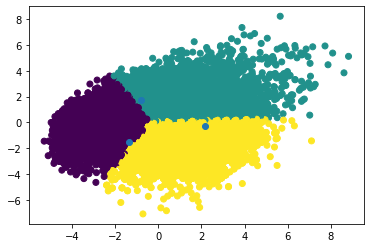

In [89]:
#Repeat steps 3 and 4 till centroid stops changing
max_iterations = 100
k=3

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

#If iteration is less than max_iteration and centriod isn't initially a dataframe. 
#Subsequently old_centroid becomes centroid
while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids = centroids

  labels = get_labels(data, centroids)
  centroids = new_centroids(data, labels, k)
  plot_clusters(data, labels, centroids, iteration)
  iteration =+ 1


In [90]:
centroids

,0,1,2
overall,3.443294,6.336567,5.200401
potential,5.362259,7.107863,4.894314
wage_eur,1.031502,1.460086,1.130802
value_eur,1.029525,1.313192,1.049844
age,2.678624,3.877681,5.962199


In [91]:
player_df[labels==0][['short_name'] + features]

,short_name,overall,potential,wage_eur,value_eur,age
7025,Sandeiro Leal,68,68,7000.0,1400000.0,21
8028,Narcisso Mau,67,67,4000.0,1100000.0,21
8029,Botelhinonsa,67,67,4000.0,1100000.0,21
8030,Edenildo Lagoas,67,67,3000.0,1100000.0,21
8040,Dener Rolim,67,67,4000.0,1200000.0,21
...,...,...,...,...,...,...
19234,Song Defu,47,52,1000.0,70000.0,22
19235,C. Porter,47,59,500.0,110000.0,19
19236,N. Logue,47,55,500.0,100000.0,21
19237,L. Rudden,47,60,500.0,110000.0,19


In [92]:
#Compare with implementation in scikit-learn
from sklearn.cluster import KMeans

In [93]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [94]:
KMeans(n_clusters=3)

KMeans(n_clusters=3)

In [95]:
centroids = kmeans.cluster_centers_

In [96]:
pd.DataFrame(centroids, columns=features).T

,0,1,2
overall,3.874743,5.222748,6.788949
potential,5.664890,4.890613,7.230580
wage_eur,1.043762,1.125337,1.718863
value_eur,1.039236,1.044331,1.452792
age,2.899166,6.129590,4.474391
